In [1]:
# Import the os module
import os

# Get the current working directory
cwd = os.getcwd()

# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Print the type of the returned object
print("os.getcwd() returns an object of type: {0}".format(type(cwd)))

Current working directory: E:\Python_00781035\OC_2021_project
os.getcwd() returns an object of type: <class 'str'>


In [2]:
# Change the current working directory
os.chdir('E:\Python_00781035\OC_2021_project\data')

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))


Current working directory: E:\Python_00781035\OC_2021_project\data


In [3]:
os.chdir('E:\Python_00781035\OC_2021_project')
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
x = np.linspace(-np.pi,np.pi,100)
y = np.sin(x)

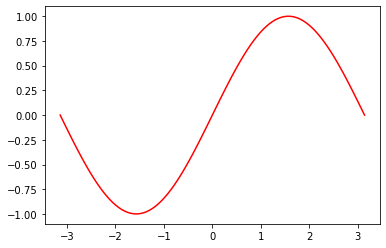

In [5]:
plt.plot(x,y,'r-')

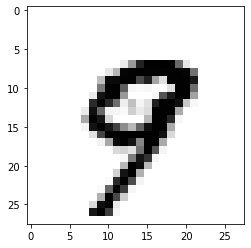

In [6]:
# 由Keras讀入MNIST (6萬筆訓練資料，1萬筆測試資料)
from tensorflow.keras.datasets import mnist 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# len(x_train)
# len(y_train)
# x_train[87].shape
plt.imshow(x_train[87], cmap='Greys')

In [7]:
# x_train.shape # (60000, 28, 28)
# x_test.shape # (10000, 28, 28)
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [8]:
from tensorflow.keras.utils import to_categorical #讀入工具套件
y_train = to_categorical(y_train, 10) # 進行"1-hot enconding"轉換，共有10種輸出
y_test = to_categorical(y_test, 10) # 進行"1-hot enconding"轉換，共有10種輸出
y_train[87]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [9]:
from tensorflow.keras.models import Sequential # 讀入Sequential工具
from tensorflow.keras.layers import Dense, Activation # 讀入Dense和Activation工具
from tensorflow.keras.optimizers import SGD # 讀入SGD工具

In [10]:
model = Sequential() # 建立一個空的神經網路
model.add(Dense(500, input_dim=784)) # 從第一個隱藏層開始，每次用 add 去加一層神經網路 (500個神經元)
model.add(Activation('sigmoid')) # 第一個隱藏層的激活函數選擇'sigmoid'
model.add(Dense(500)) # 第二個隱藏層 (500個神經元)
model.add(Activation('sigmoid')) # 第二個隱藏層的激活函數選擇'sigmoid'

In [11]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [12]:
model.compile(loss='mse', optimizer=SGD(learning_rate=0.1),metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
activation (Activation)      (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5010      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
__________________________________________________